In [1]:
import os 
from scipy import interpolate
import numpy as np
import math

import codecs
import matplotlib.pyplot as plt

from astropy.io import fits

import matplotlib.ticker as ticker

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
import matplotlib as mpl

from photutils import CircularAperture
from photutils import CircularAnnulus
from photutils import aperture_photometry

from photutils import isophote
from photutils.isophote import EllipseGeometry

from photutils.isophote import Ellipse
from photutils.isophote import EllipseSample

from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans, convolve
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import signal
from scipy.ndimage.filters import median_filter
from photutils.isophote import EllipseFitter

In [2]:
aper_arcsec = np.logspace(math.log10(0.03),math.log10(4.5),20)
aper_pix60mas = aper_arcsec/0.06


psf160_hdu = fits.open('gs_psf_f160w.fits')[0]
psf160_data = psf160_hdu.data
Ndim = psf160_hdu.header['NAXIS1']
cen = int((Ndim+1)/2-1)

In [3]:
#old method; 
geometry = EllipseGeometry(x0=cen, y0=cen, sma=2, eps=0.001, pa=0,fix_eps=True,fix_center=True)  # ,fix_eps=True, fix_pa=True, fix_center=True
ellipse = Ellipse(psf160_data, geometry)  
iso1 = np.zeros(20)  
for aper_id in range(len(aper_pix60mas)):

     sma_aper = aper_pix60mas[aper_id]
     isolist1 = ellipse.fit_isophote(sma=sma_aper)  #,noniterate=False
     iso1[aper_id] = isolist1.intens


#Zhang's method
geo = EllipseGeometry(x0=cen, y0=cen, sma=2, eps=0.001, pa=0,fix_eps=True,fix_center=True, fix_pa=False)  # ,fix_eps=True, fix_pa=True, fix_center=True
iso2 = np.zeros(20)
for aper_id in range(len(aper_pix60mas)):   
    sample2  = EllipseSample(psf160_data, aper_pix60mas[aper_id], geometry=geo)
    Fitter2  = EllipseFitter(sample2)
    isolist2 = Fitter2.fit(maxit=1,going_inwards=True, conver=0.0)
    iso2[aper_id] = isolist2.intens


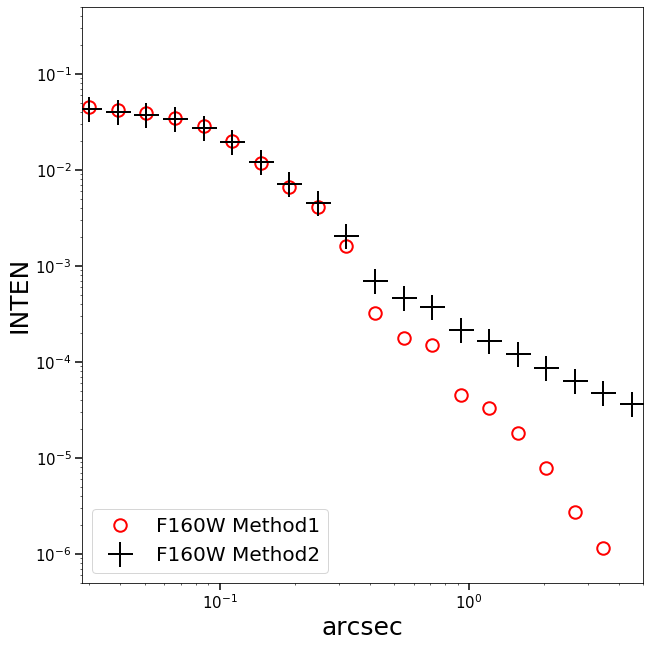

In [4]:
fig1,axes=plt.subplots(figsize=(10,10), nrows=1,ncols=1, sharex=True)
plt.subplots_adjust(top=0.9, bottom = 0.1, left = 0.12, right = 0.9) 
axes.plot(aper_arcsec, iso1,  color = 'red', marker = '.', fillstyle='none', linestyle='none', markersize=25,markeredgewidth=2,label= 'F160W Method1')
axes.plot(aper_arcsec, iso2, color = 'black', marker = '+', fillstyle='none', linestyle='none', markersize=25,markeredgewidth=2,label= 'F160W Method2')

axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim(2.8e-2,5)
axes.set_ylim(5e-7,0.5)
axes.legend(loc='lower left', fontsize= 20) 
axes.set_ylabel('INTEN', fontsize=25)
axes.set_xlabel('arcsec', fontsize=25)
axes.tick_params(which='major', width=1.50, length=7, labelsize=15)
axes.tick_params(which='major', width=1.50, length=7, labelsize=15)